In [30]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import xarray as xr
import cmocean.cm as cm
# import os
# import re
import glob
from matplotlib.animation import FuncAnimation

In [24]:
# fnames = os.listdir('01mar23_31mar23')
fnames_phys = glob.glob('01mar23_31mar23/*_grid_T_*.nc')
fnames_fw = glob.glob('01mar23_31mar23/*_rivr_T_*.nc')
#TODO: use glob to read in the list of gridTs, then can use xr.open_mfdataset

In [25]:
phys_rivers = xr.open_mfdataset(fnames_phys)
fw_rivers = xr.open_mfdataset(fnames_fw)

In [23]:
phys_rivers

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, time_counter: 31, nvertex: 4,
                           deptht: 40, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2023-03-01T12:00:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_nav_lat        (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                  (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    sossheig              (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    votemper              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    vosaline              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    sigma_theta           (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    e3t                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20230301_20230331_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-31 00:39:56 GMT
    uuid:         06793de8-9ee7-404a-b360-bbc4a215c96e

In [8]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

## Surface salinity and temperature

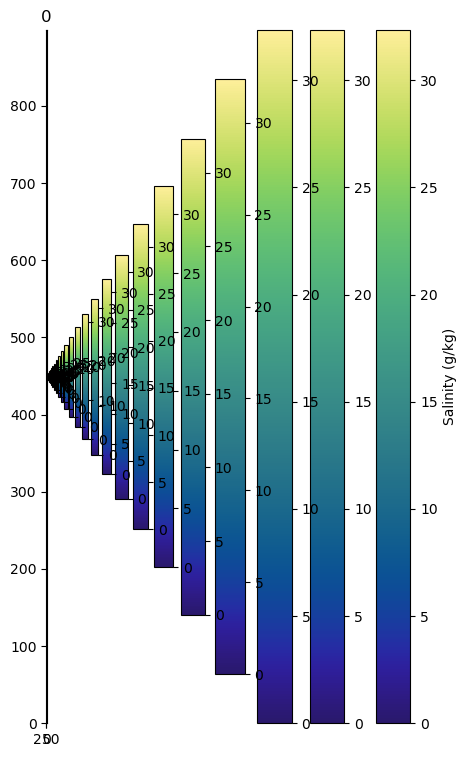

In [32]:
depth = 0 
cmap = cm.haline
cmap.set_bad('gray')

fig, ax = plt.subplots(1,1, figsize = (5, 9))
data = phys_rivers['vosaline'].isel(time_counter=0, deptht = depth)
colours = ax.pcolormesh(data, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)
plt.colorbar(colours, ax=ax, label='Salinity (g/kg)')

def newframe(frame_num):
    data = phys_rivers['vosaline'].isel(time_counter=frame_num, deptht = depth)
    colours = ax.pcolormesh(data, cmap=cmap)
    cb = fig.colorbar(colours, ax=ax)
    ax.set_title(str(frame_num))

ani = FuncAnimation(fig, newframe, frames=len(fnames_phys), repeat=False)
from IPython.display import HTML
HTML(ani.to_jshtml())

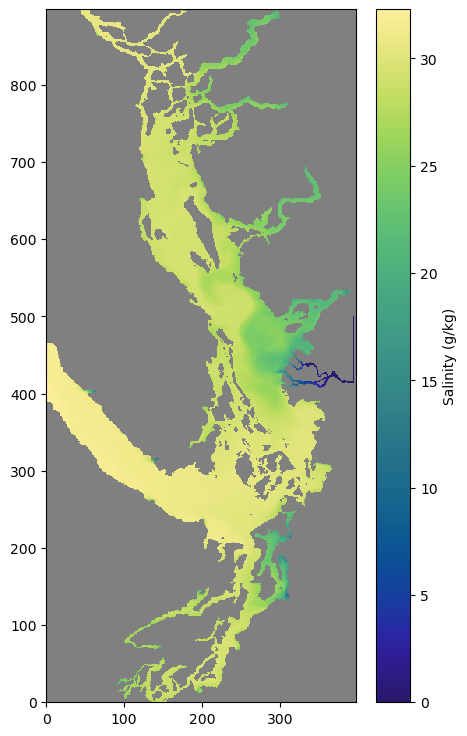

In [9]:
cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_rivers.vosaline[0, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')

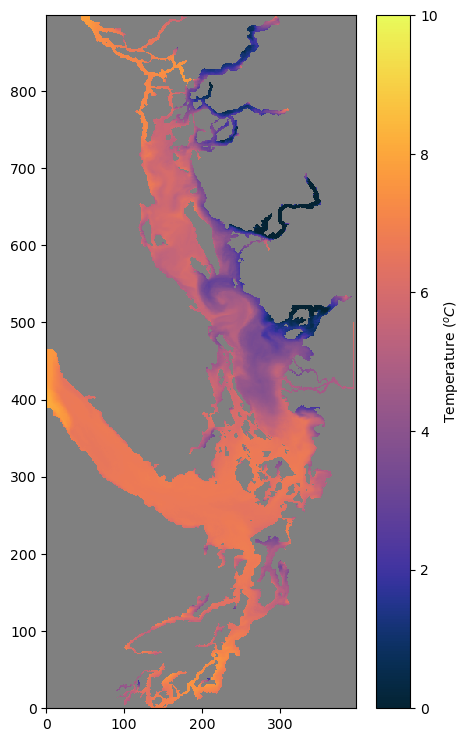

In [10]:
cmap = cm.thermal
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
temp = np.ma.masked_array(phys_rivers.votemper[0, 0], mask=tmask[0])
colours = ax.pcolormesh(temp, vmin=0, vmax=10, cmap=cmap)  #TODO: survey an entire year to pick the best vmax in the Salish Sea
cb = fig.colorbar(colours, ax=ax)
cb.set_label(r'Temperature ($^o C$)')

## Check salinity and temp against the base run

Text(0.5, 1.0, 'Timestep = 0')

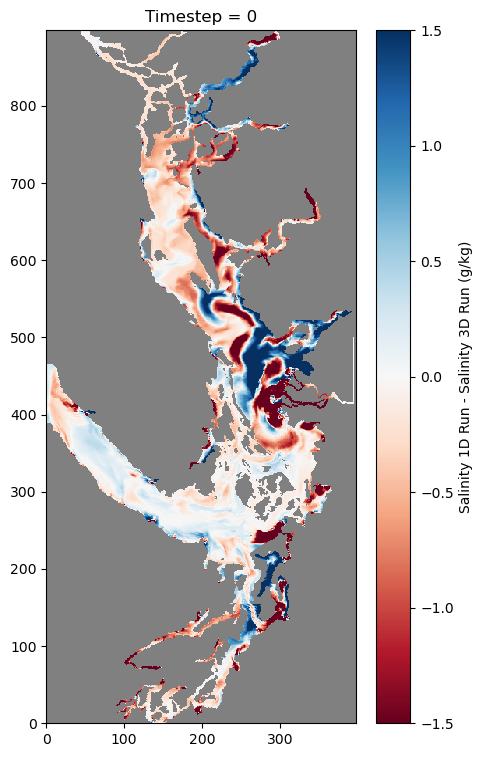

In [11]:
tstep = 0

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_rivers.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-1.5,vmax=1.5)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity 1D Run - Salinity 3D Run (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 0')

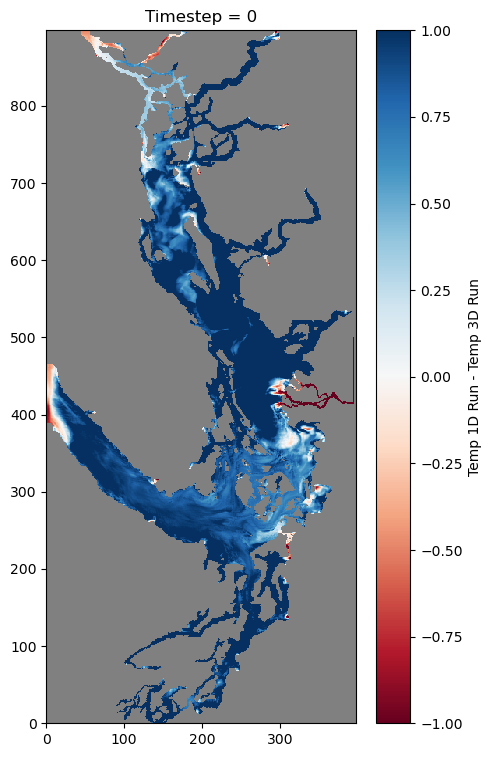

In [12]:
tstep = 0

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
temperature = np.ma.masked_array(phys_old.votemper[tstep, 0] - phys_rivers.votemper[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(temperature, cmap=cmap, vmin=-1, vmax=1)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Temp 1D Run - Temp 3D Run')
ax.set_title('Timestep = {}'.format(str(tstep)))

## Rivers

In [13]:
import salishsea_tools.river_202108 as rivers

In [14]:
def river_box(w_shed, r_call, box_side):  #TODO: change this to include the other river that falls off the edge
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    river_range = [river_idx[0] - box_side, river_idx[0] + box_side, river_idx[1] - box_side, river_idx[1] + box_side]

    if (river_range[0] < 0):
        river_range[0] = 0
        river_range[1] = box_side*2

    if (898 - river_range[1] < 0):
        river_range[0] = 898-box_side*2
        river_range[1] = 898

    return river_range

In [15]:
box_size = 30
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
Skagit = river_box('skagit', 'Skagit1', box_size)
Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
Elwha = river_box('jdf', 'Elwha', box_size)
Cowichan = river_box('evi_s', 'Cowichan1', box_size)
Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
Puntledge = river_box('evi_s', 'Puntledge', box_size)
Salmon = river_box('evi_n', 'SalmonSayward', box_size)
Homathko = river_box('bute', 'Homathko', box_size)
Squamish = river_box('howe', 'Squamish', box_size)

In [16]:
gridX = np.arange(Nooksack[0],Nooksack[1])
gridY = np.arange(Nooksack[2],Nooksack[3])

# Visualizations of dye

In [17]:
fudge = .0001 # need to add very small number here because we can't do log of zero without weird effects in the masking

In [18]:
np.nansum(fw_rivers.nooksack_river[tstep, 0].to_numpy())

11416.486

In [19]:
fw_rivers.skagit_river

<xarray.DataArray 'skagit_river' (time_counter: 1, deptht: 40, y: 898, x: 398)>
[14296160 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
  * deptht         (deptht) float32 0.5 1.5 2.5 3.5 ... 360.7 387.6 414.5 441.5
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2023-03-31T12:00:00
Dimensions without coordinates: y, x
Attributes:
    long_name:           Skagit River
    units:               1
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 40 s)
    cell_measures:       area: area

## View all dye in the domain

Text(0.5, 1.0, 'River Subset, Timestep = 0')

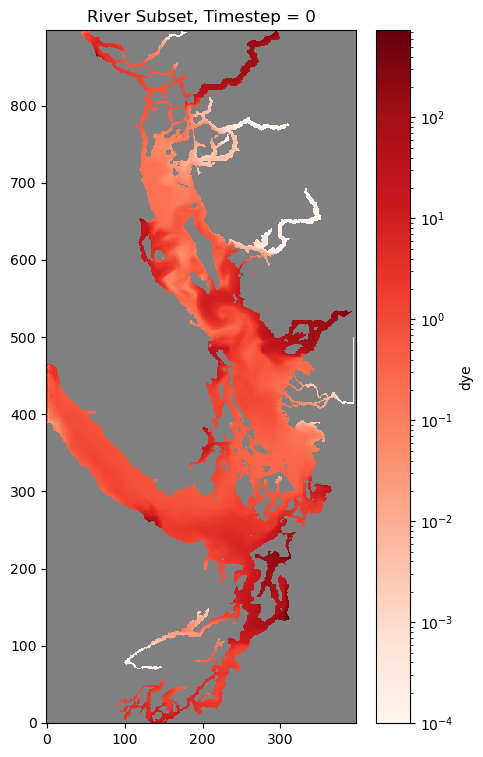

In [20]:
tstep = 0

subset_rivers = fw_rivers.nooksack_river[tstep, 0] + fw_rivers.skagit_river[tstep, 0] + fw_rivers.snohomish_river[tstep, 0] + fw_rivers.nisqually_river[tstep, 0] + fw_rivers.elwha_river[tstep, 0] + \
    fw_rivers.cowichan_river[tstep, 0] + fw_rivers.nanaimo_river[tstep, 0] + fw_rivers.puntledge_river[tstep, 0] + fw_rivers.salmon_river[tstep, 0] + fw_rivers.homathko_river[tstep, 0] + \
    fw_rivers.squamish_river[tstep, 0]

freshwater = np.ma.masked_array(subset_rivers, mask=tmask[0])

X = np.arange(0,398)
Y = np.arange(0,898)
Z = freshwater + fudge

cmap = mpl.colormaps['Reds']
cmap.set_bad('grey')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('dye')
ax.set_title('River Subset, Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'nooksack River, Timestep = 0')

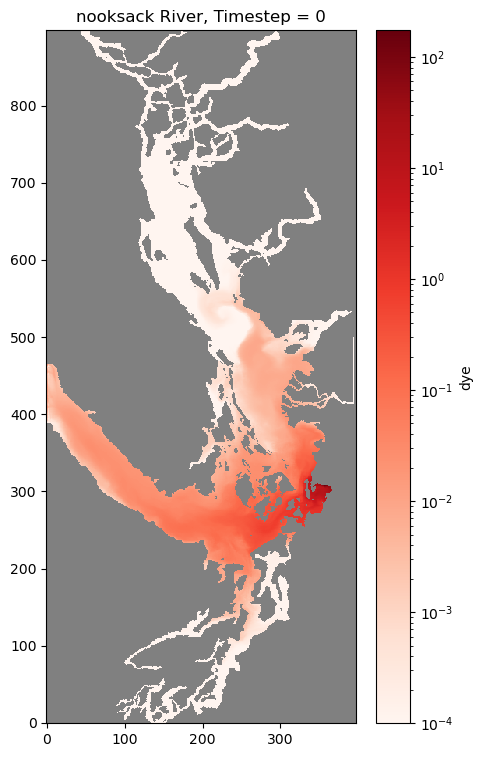

In [43]:
tstep = 0

subset_rivers = fw_rivers.nooksack_river[tstep, 0]

freshwater = np.ma.masked_array(subset_rivers, mask=tmask[0])

X = np.arange(0,398)
Y = np.arange(0,898)
Z = freshwater + fudge

cmap = mpl.colormaps['Reds']
cmap.set_bad('grey')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('dye')
ax.set_title('nooksack River, Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Other Rivers, Timestep = 0')

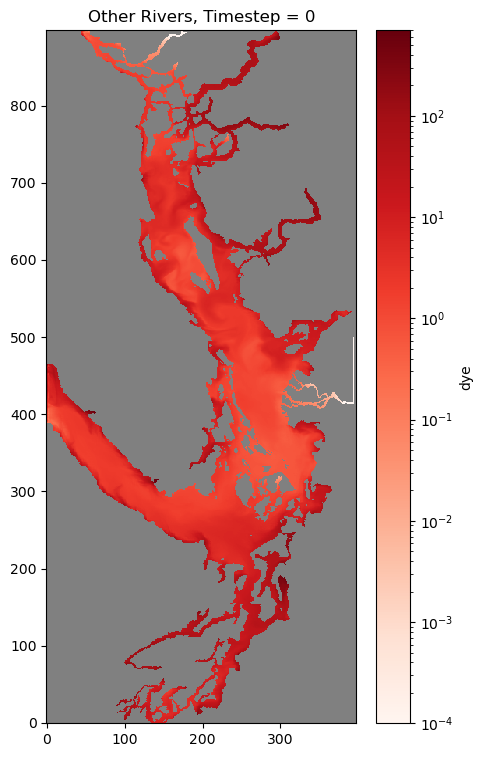

In [22]:
tstep = 0

freshwater = np.ma.masked_array(fw_rivers.other_rivers[tstep, 0], mask=tmask[0])

X = np.arange(0,398)
Y = np.arange(0,898)
Z = freshwater + fudge

cmap = mpl.colormaps['Reds']
cmap.set_bad('grey')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('dye')
ax.set_title('Other Rivers, Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Fraser River, Timestep = 0')

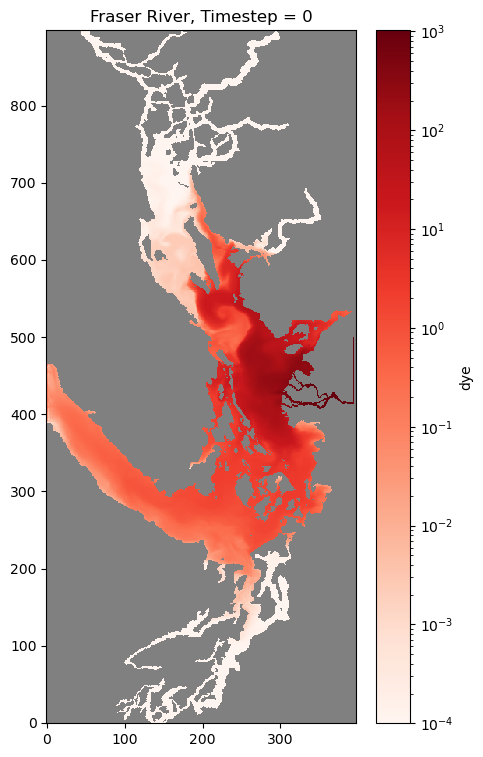

In [23]:
tstep = 0

freshwater = np.ma.masked_array(fw_rivers.fraser_river[tstep, 0], mask=tmask[0])

X = np.arange(0,398)
Y = np.arange(0,898)
Z = freshwater + fudge

cmap = mpl.colormaps['Reds']
cmap.set_bad('grey')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('dye')
ax.set_title('Fraser River, Timestep = {}'.format(str(tstep)))

## Surface plan views

Text(0.5, 1.0, 'Timestep = 0')

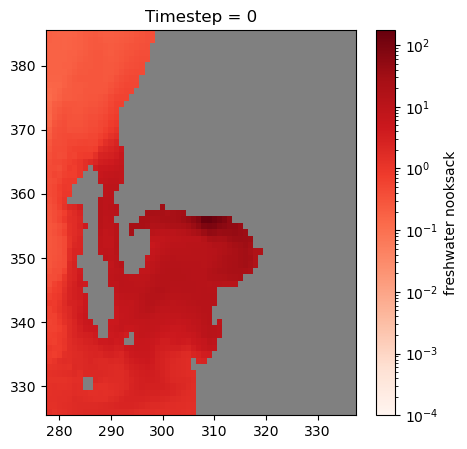

In [24]:
tstep = 0
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, 0], mask=tmask[0])

X = gridX
Y = gridY
Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge

cmap = mpl.colormaps['Reds']
cmap.set_bad('grey')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Timestep = {}'.format(str(tstep)))

/tmp/ipykernel_3457204/4034766943.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)


Text(0.5, 1.0, 'Timestep = 0')

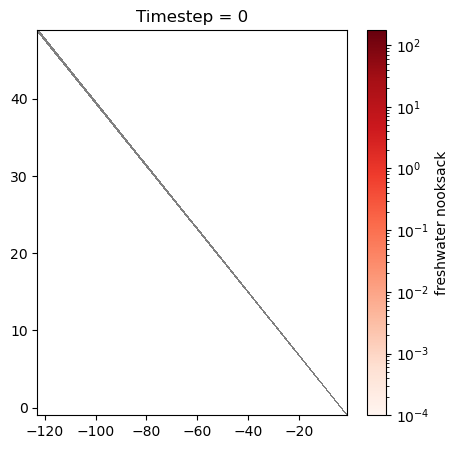

In [25]:
tstep = 0

freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, 0], mask=tmask[0])
X = fw_rivers.nav_lon[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]]
Y = fw_rivers.nav_lat[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]]
Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge  # need to add very small number here because we can't do log of zero without weird effects in the masking

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Timestep = {}'.format(str(tstep)))

## Side slice views

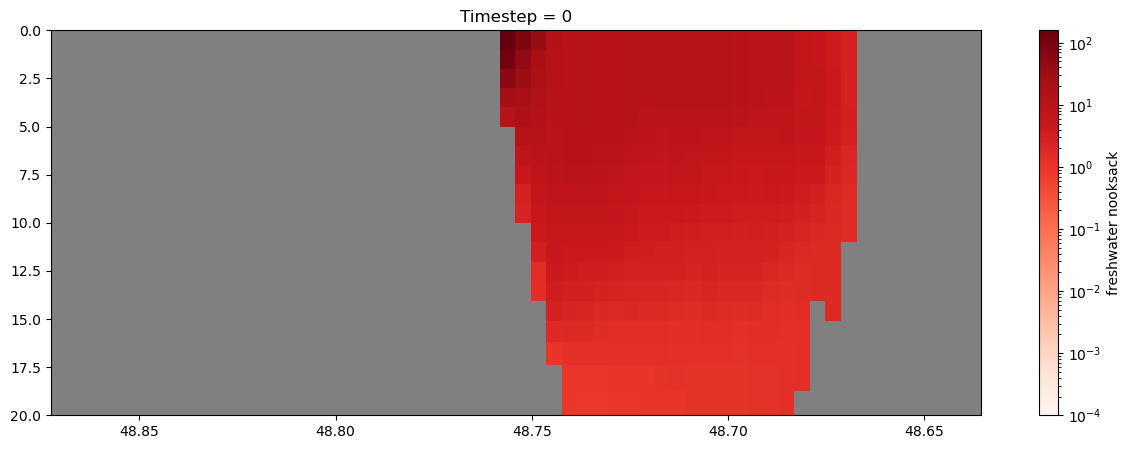

In [26]:
# vertical slice

tstep = 0

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :, :, rivers.prop_dict['fraser']['Nooksack']['j']], mask=tmask[:, :, rivers.prop_dict['fraser']['Nooksack']['j']])

X = fw_rivers.nav_lat[Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']+1]
Y = fw_rivers.deptht
Z = freshwater[:, Nooksack[0]:Nooksack[1]] + fudge

colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)

cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.set_ylim(0, 20)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

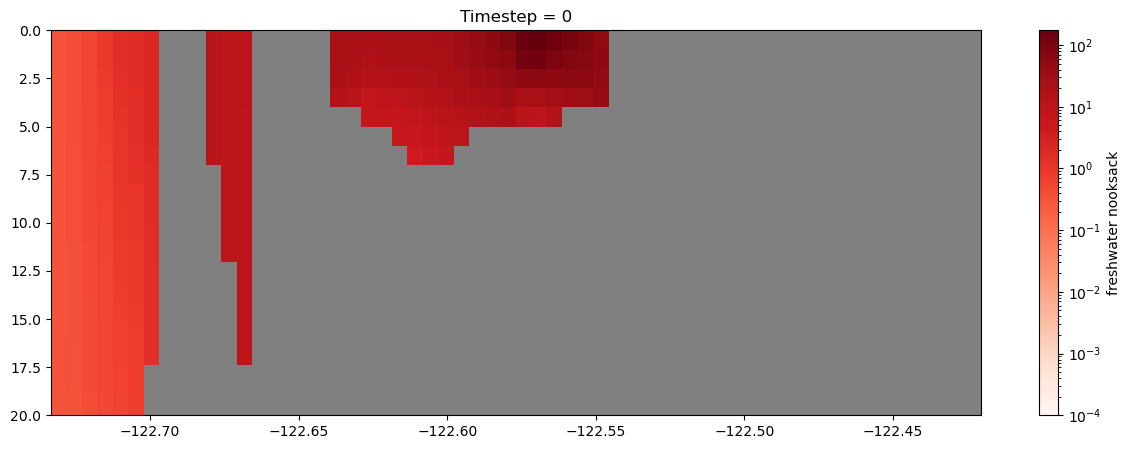

In [27]:
# horizontal slice

tstep = 0

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :, rivers.prop_dict['fraser']['Nooksack']['i'], :], mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], :])

X = fw_rivers.nav_lon[rivers.prop_dict['fraser']['Nooksack']['i']+1, Nooksack[2]:Nooksack[3]]
Y = fw_rivers.deptht
Z = freshwater[:, Nooksack[2]:Nooksack[3]] + fudge

colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)

cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.set_ylim(0, 20)

plt.gca().invert_yaxis()

# Sum views

Text(0.5, 1.0, 'Plan Sum \nTimestep = 0')

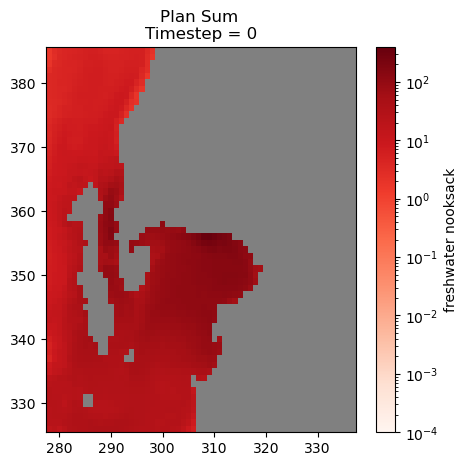

In [28]:
tstep = 0

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :], mask=tmask[:])
freshwater = freshwater.sum(axis=0)

X = gridX
Y = gridY
Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge

colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Plan Sum \nTimestep = {}'.format(str(tstep)))

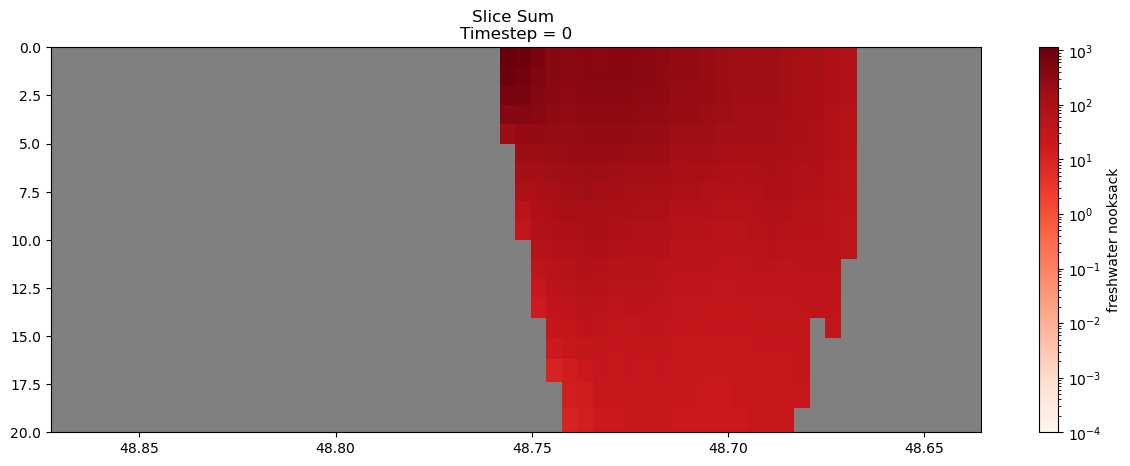

In [29]:
# vertical slice sum
sum_size = 30
tstep = 0

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :, :, :], mask=tmask[:, :, :])

X = fw_rivers.nav_lat[Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']+1]
Y = fw_rivers.deptht
Z = np.ma.masked_array(freshwater[:, Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']-sum_size:rivers.prop_dict['fraser']['Nooksack']['j']+sum_size].sum(axis=2), mask=tmask[:, Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']])

colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)

cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Slice Sum \nTimestep = {}'.format(str(tstep)))
ax.set_ylim(0, 20)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

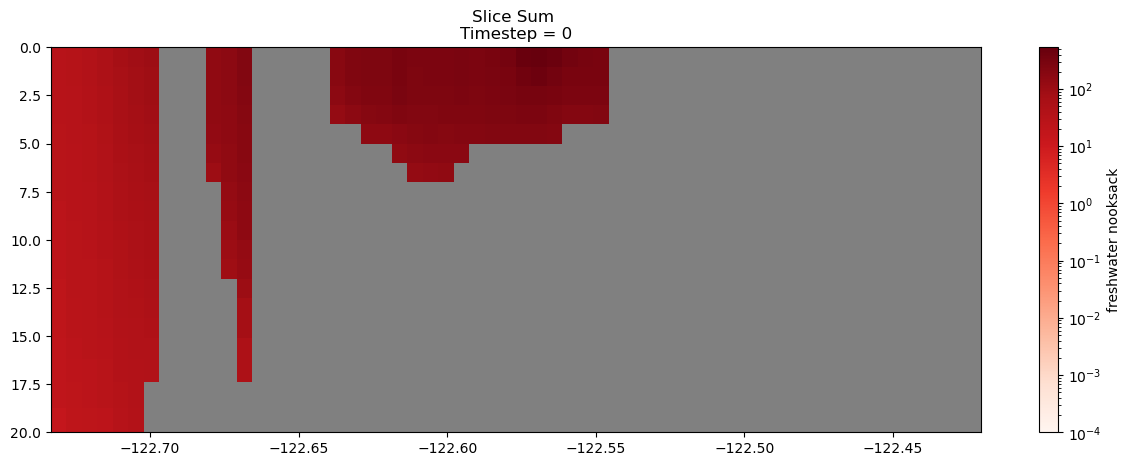

In [30]:
# horizontal slice sum
sum_size = 30
tstep = 0

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :, :, :], mask=tmask[:, :, :])

X = fw_rivers.nav_lon[rivers.prop_dict['fraser']['Nooksack']['i']+1, Nooksack[2]:Nooksack[3]]
Y = fw_rivers.deptht
Z = np.ma.masked_array(freshwater[:, rivers.prop_dict['fraser']['Nooksack']['i']-sum_size:rivers.prop_dict['fraser']['Nooksack']['i']+sum_size, Nooksack[2]:Nooksack[3]].sum(axis=1), mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], Nooksack[2]:Nooksack[3]])

colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)

cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Slice Sum \nTimestep = {}'.format(str(tstep)))
ax.set_ylim(0, 20)

plt.gca().invert_yaxis()

# Surface velocity

In [31]:
zoom_fac = 13
tstep = 0


vel_mag = np.sqrt(vvels.vomecrty[tstep, 0]**2 + vvels.vomecrty[tstep, 0]**2)

cmap = cm.speed
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

u_vels = np.ma.masked_array(uvels.vozocrtx[tstep, 0], mask=tmask[0])[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]]
v_vels = np.ma.masked_array(vvels.vomecrty[tstep, 0], mask=tmask[0])[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]]
freshwater = np.ma.masked_array(vel_mag, mask=tmask[0])

X = gridX
Y = gridY
Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge

colours = ax.pcolormesh(X, Y, Z, vmin=0, vmax=1, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('velocity magnitude (m/s)')

X, Y = np.meshgrid(X, Y)

ax.quiver(X, Y, u_vels, v_vels, scale=5)
ax.set_title('Velocity \nTimestep = {}'.format(str(tstep)))
ax.set_xlim(Nooksack[0]+zoom_fac, Nooksack[1]-zoom_fac)
ax.set_ylim(Nooksack[2]+zoom_fac, Nooksack[3]-zoom_fac)

NameError: name 'vvels' is not defined

In [ ]:
#TODO: likely in another script, should i have one that has each individual water? if not, i need to show that they are far enough away that they don't really interact. when does water no longer "belong" to each river?